In [88]:
from rdkit import Chem
import numpy as np
import pandas as pd
from IPython.display import display
import tqdm

# Load simulator data

In [89]:
dataset = pd.read_csv("/home/abhor/Desktop/datasets/my_uspto/simulator_dataset.csv", index_col=0)

In [90]:
dataset

,reactants,products,rsig,psig,rsub,psub,rcen,pcen,rbond,pbond
0,CON(C)C(=O)c1ccc(O)nc1,CC(C)CC(=O)c1ccc(O)nc1,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][CH:1]([CH3:2])[CH2:3][C:4](=[O:5])[c:6...,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][CH:1]([CH3:2])[CH3:3],[2],[3],[[1.0]],[[1.0]]
1,O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],[cH:3]1[cH:4][cH:5][c:6]([Cl:7])[cH:8][cH:12]1,[CH3:0][NH:1][c:2]1[cH:3][cH:4][cH:5][cH:9][cH...,[ClH:7],[CH3:0][NH2:1],[7],[1],[[1.0]],[[1.0]]
2,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(N)cc3)cc21,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(NC=O)cc3)cc21,[n:2]1[cH:3][cH:4][cH:8][c:10]2[cH:11][cH:12][...,[n:2]1[cH:3][cH:4][cH:8][c:10]2[cH:11][cH:12][...,[NH3:19],[NH2:19][CH:20]=[O:21],[19],[19],[[1.0]],[[1.0]]
3,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)O)c1,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)Nc...,[cH:6]1[cH:7][cH:8][cH:22][c:23]([C:24](=[O:25...,[cH:6]1[cH:7][cH:8][cH:22][c:23]([C:24](=[O:25...,[OH2:26],[NH2:26][c:27]1[cH:28][n:29][c:30]([CH3:31])[c...,[26],[26],[[1.0]],[[1.0]]
4,Clc1cc2c(Cl)nc(-c3ccncc3)nc2s1,Clc1cc2c(NCc3ccc(Cl)c(Cl)c3)nc(-c3ccncc3)nc2s1,[cH:1]1[cH:2][c:3]2[c:4]([Cl:5])[n:6][c:7](-[c...,[cH:1]1[cH:2][c:3]2[c:4]([NH:5][CH2:6][c:7]3[c...,[ClH:5],[NH2:5][CH2:6][c:7]1[cH:8][cH:9][c:10]([Cl:11]...,[5],[5],[[1.0]],[[1.0]]
...,...,...,...,...,...,...,...,...,...,...
448504,CCP(CC)CC,CCCCOS(=O)(=O)[O-],[CH3:0][CH2:1][P:2]([CH2:3][CH3:4])[CH2:5][CH3:6],[CH3:0][CH2:1][CH2:2][CH2:3][O:4][S:5](=[O:6])...,[PH:2]([CH2:3][CH3:4])[CH2:5][CH3:6],[CH3:2][CH2:3][O:4][S:5](=[O:6])(=[O:7])[O-:8],[2],[2],[[1.0]],[[1.0]]
448505,CCCCOS(=O)(=O)OCCCC,CCCC[P+](CC)(CC)CC,[CH3:2][CH2:3][O:4][S:5](=[O:6])(=[O:7])[O:8][...,[CH3:2][CH2:3][P+:4]([CH2:5][CH3:6])([CH2:7][C...,[OH:4][S:5](=[O:6])(=[O:7])[O:8][CH2:9][CH2:10...,[P+:4]([CH2:5][CH3:6])([CH2:7][CH3:8])[CH2:9][...,[4],[4],[[1.0]],[[1.0]]
448506,Cc1cccc(C)c1N=C1NCCN1OCc1ccccn1,Cc1cccc(C)c1N=C1NCCN1O,[NH2:13][O:14][CH2:15][c:16]1[cH:17][cH:18][cH...,NaN,[CH3:15][c:16]1[cH:17][cH:18][cH:19][cH:20][n:...,NaN,[15],[],[[1.0]],[]
448507,Clc1ccnc(Cl)c1,N[n+]1ccc(Cl)cc1Cl,[cH:1]1[cH:2][cH:3][n:4][cH:5][cH:7]1,[NH2:0][n+:1]1[cH:2][cH:3][cH:4][cH:6][cH:7]1,[nH3:4],[NH2:0][n+:1],[4],[1],"[[1.5, 1.5]]","[[1.5, 1.5]]"


# Filtering dataset

temp_df = dataset.loc[~rsub_worked]

temp_df

i= 0

Chem.MolFromSmiles("[n:1]1[c:2]([CH2:3][C:4]#[N:5])[n:6][n:7][CH:8]1")

def mol_with_atom_index( mol ):
    mol = Chem.Mol(mol)
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

r, p, rsig, psig, rsub, psub, rcen, pcen, _, _ = temp_df.iloc[i]

display(mol_with_atom_index(Chem.MolFromSmiles(r)))
display(Chem.MolFromSmiles(p))
display(Chem.MolFromSmiles(rsig))
# display(Chem.MolFromSmiles(remove_h(rsig)))
# display(Chem.MolFromSmiles(remove_extra_cycle(rsig)))
display(Chem.MolFromSmiles(remove_h(psig)))
print(rsub)
display(Chem.MolFromSmiles(rsub))
print(psub)
display(Chem.MolFromSmiles(psub))

i+=1

In [96]:
import re
def remove_h(smiles): 
    return re.sub("H[0-9]?", "", smiles)
# remove_extra_cycle = lambda smiles: re.sub("\(.?\[[^\]]*\][2-9][^\)]*[2-9]\)", "", smiles)

def cure_ending_aromatic_atom(smiles):
    matches = re.findall("\[[^\]]+\]", smiles)
    idx_to_fix = 0
    if len(matches) == 1:
        if matches[0][1].islower():
            pass # Fix idx 0
        else:
            return smiles # Do nothing
    else:
        if matches[0][1].islower():
            if matches[-1][1].islower():
                return smiles # both lower - do nothing
            else:
                pass # first lower - fix idx 0
        else:
            if matches[-1][1].islower():
                idx_to_fix = -1 # last lower - fix idx -1
            else:
                return smiles # both upper - do nothing
    
    matches[idx_to_fix] = matches[idx_to_fix][:1] + matches[idx_to_fix][1].upper() + matches[idx_to_fix][2:]
    return "".join(matches)

# First we remove those reactions where the signature extraction didnt work properly 
# In these cases, the Chem.Mol of either of rsig or psig is None
rsub_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["rsub"].tolist())))
psub_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["psub"].tolist())))
rsig_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["rsig"].tolist())))
psig_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["psig"].tolist())))

dataset.loc[~rsub_worked, "rsub"] = list(map(cure_ending_aromatic_atom, dataset[~rsub_worked]["rsub"]))
dataset.loc[~psub_worked, "psub"] = list(map(cure_ending_aromatic_atom, dataset[~psub_worked]["psub"]))
dataset.loc[~rsig_worked, "rsig"] = list(map(remove_h, dataset[~rsig_worked]["rsig"]))
dataset.loc[~psig_worked, "psig"] = list(map(remove_h, dataset[~psig_worked]["psig"]))

In [97]:
# First we remove those reactions where the signature extraction didnt work properly 
# In these cases, the Chem.Mol of either of rsig or psig is None
rsub_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["rsub"].tolist())))
psub_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["psub"].tolist())))

dataset = dataset[rsub_worked & psub_worked]

rsig_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["rsig"].tolist())))
psig_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["psig"].tolist())))

dataset = dataset[rsig_worked & psig_worked]
print(dataset.shape)

(389614, 10)


In [98]:
# we only consider actions from the following reactions: 
# 1. len(rcen) >= len(pcen) (Hydrogen in product is allowed)
# 2. len(rcen) != 0. len(pcen) == 0 is allowed. = 0 means Hydrogen, so we do not want Hydrogen removals because
#    there are too many options in that case. Adding a Hydrogen is fine since that is deterministic.
# 3. len(rcen) <= 2 and len(pcen) <= 2. The cases where this is not true is typically because the 
#    reactant-product mapping is wrong. These cases are very few anyways so it's fine.
rlen = np.array(list(map(lambda x: len(x.strip("[]").split(",")) if len(x) > 2 else 0, dataset["rcen"])))
plen = np.array(list(map(lambda x: len(x.strip("[]").split(",")) if len(x) > 2 else 0, dataset["pcen"])))

dataset = dataset[(rlen>=plen) & (rlen!=0) & (rlen<=2) & (plen<=2)]
dataset

,reactants,products,rsig,psig,rsub,psub,rcen,pcen,rbond,pbond
0,CON(C)C(=O)c1ccc(O)nc1,CC(C)CC(=O)c1ccc(O)nc1,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][CH:1]([CH3:2])[CH2:3][C:4](=[O:5])[c:6...,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][CH:1]([CH3:2])[CH3:3],[2],[3],[[1.0]],[[1.0]]
1,O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],[cH:3]1[cH:4][cH:5][c:6]([Cl:7])[cH:8][cH:12]1,[CH3:0][NH:1][c:2]1[cH:3][cH:4][cH:5][cH:9][cH...,[ClH:7],[CH3:0][NH2:1],[7],[1],[[1.0]],[[1.0]]
2,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(N)cc3)cc21,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(NC=O)cc3)cc21,[n:2]1[cH:3][cH:4][cH:8][c:10]2[cH:11][cH:12][...,[n:2]1[cH:3][cH:4][cH:8][c:10]2[cH:11][cH:12][...,[NH3:19],[NH2:19][CH:20]=[O:21],[19],[19],[[1.0]],[[1.0]]
3,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)O)c1,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)Nc...,[cH:6]1[cH:7][cH:8][cH:22][c:23]([C:24](=[O:25...,[cH:6]1[cH:7][cH:8][cH:22][c:23]([C:24](=[O:25...,[OH2:26],[NH2:26][c:27]1[cH:28][n:29][c:30]([CH3:31])[c...,[26],[26],[[1.0]],[[1.0]]
4,Clc1cc2c(Cl)nc(-c3ccncc3)nc2s1,Clc1cc2c(NCc3ccc(Cl)c(Cl)c3)nc(-c3ccncc3)nc2s1,[cH:1]1[cH:2][c:3]2[c:4]([Cl:5])[n:6][c:7](-[c...,[cH:1]1[cH:2][c:3]2[c:4]([NH:5][CH2:6][c:7]3[c...,[ClH:5],[NH2:5][CH2:6][c:7]1[cH:8][cH:9][c:10]([Cl:11]...,[5],[5],[[1.0]],[[1.0]]
...,...,...,...,...,...,...,...,...,...,...
448501,COC(=O)c1ccc(-n2cnc3cc(C#N)ccc32)cc1,N#Cc1ccc2c(c1)ncn2-c1ccc(C(=O)N2CCC(N3CCCC3)C2...,[CH3:0][O:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][c:...,[cH:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7]1)[n:8][c...,[CH3:0][OH:1],[NH:17]1[CH2:18][CH2:19][CH:20]([N:21]2[CH2:22...,[1],[17],[[1.0]],[[1.0]]
448502,O=C(Cl)OCC(Cl)(Cl)Cl,O=C(O)OCC(Cl)(Cl)Cl,[O:0]=[C:1]([Cl:2])[OH:3],[O:0]=[C:1]([OH:2])[OH:3],[ClH:2],[OH2:2],[2],[2],[[1.0]],[[1.0]]
448504,CCP(CC)CC,CCCCOS(=O)(=O)[O-],[CH3:0][CH2:1][P:2]([CH2:3][CH3:4])[CH2:5][CH3:6],[CH3:0][CH2:1][CH2:2][CH2:3][O:4][S:5](=[O:6])...,[PH:2]([CH2:3][CH3:4])[CH2:5][CH3:6],[CH3:2][CH2:3][O:4][S:5](=[O:6])(=[O:7])[O-:8],[2],[2],[[1.0]],[[1.0]]
448505,CCCCOS(=O)(=O)OCCCC,CCCC[P+](CC)(CC)CC,[CH3:2][CH2:3][O:4][S:5](=[O:6])(=[O:7])[O:8][...,[CH3:2][CH2:3][P+:4]([CH2:5][CH3:6])([CH2:7][C...,[OH:4][S:5](=[O:6])(=[O:7])[O:8][CH2:9][CH2:10...,[P+:4]([CH2:5][CH3:6])([CH2:7][CH3:8])[CH2:9][...,[4],[4],[[1.0]],[[1.0]]


In [99]:
# Mare sure no hydrogens in reactions. For product, add hydrogen to the actions
assert not dataset["rsig"].isna().any(), "There are hydrogens in reactant signatures!!!!"

# In the previous script, I forgot to add atom number to hydrogen. Let's do that too.
dataset.loc[dataset["rsub"]=="[H]"]["rsig"] = "[H:0]"
dataset.loc[dataset["rsub"]=="[H]"]["rsub"] = "[H:0]"

dataset.loc[dataset["psig"].isna(), "pcen"] = "[0]"
dataset.loc[dataset["psig"].isna(), "psub"] = "[H:0]"
dataset.loc[dataset["psig"].isna(), "psig"] = "[H:0]"

In [100]:
# Taking a look at what combinations are left
rlen = np.array(list(map(lambda x: len(x.strip("[]").split(",")) if len(x) > 2 else 0, dataset["rcen"])))
plen = np.array(list(map(lambda x: len(x.strip("[]").split(",")) if len(x) > 2 else 0, dataset["pcen"])))
np.unique(list(map(lambda x, y: f"{x}-{y}", rlen, plen)), return_counts=True)

(array(['1-1', '2-1', '2-2'], dtype='<U3'), array([378628,   4485,    464]))

So there are  
400K pairs of 1-1  
4.7K pairs of 2-1  
0.5K pairs of 2-2  

Now let us sort the ones which have 2 in them

In [101]:
# temp_df = dataset[(rlen!=1) & (plen!=1)]
temp_df = dataset[(rlen!=2) & (plen!=2)]

In [102]:
# First let us remove those cases where number of centres is more than number of signatures
rcenlen = np.array(list(map(lambda x: len(x.split(",")), temp_df["rcen"])))
pcenlen = np.array(list(map(lambda x: len(x.split(",")), temp_df["pcen"])))
rsiglen = np.array(list(map(lambda x: len(x.split(".")), temp_df["rsig"])))
psiglen = np.array(list(map(lambda x: len(x.split(".")), temp_df["psig"])))

temp_df = temp_df[(rcenlen==rsiglen) & (pcenlen==psiglen)]

In [103]:
# First take a look at some
i = -1

reactants                               CON(C)C(=O)c1ccc(O)nc1
products                                CC(C)CC(=O)c1ccc(O)nc1
rsig         [CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...
psig         [CH3:0][CH:1]([CH3:2])[CH2:3][C:4](=[O:5])[c:6...
rsub                                 [CH3:0][O:1][NH:2][CH3:3]
psub                             [CH3:0][CH:1]([CH3:2])[CH3:3]
rcen                                                       [2]
pcen                                                       [3]
rbond                                                  [[1.0]]
pbond                                                  [[1.0]]
Name: 0, dtype: object
Reactant


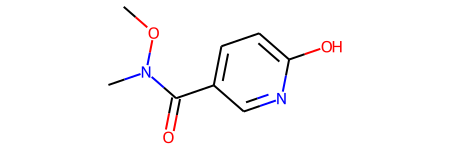

Product


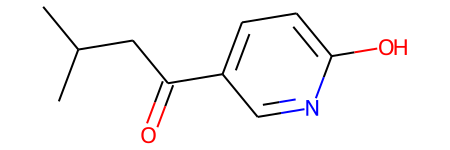

Reactant subgroup


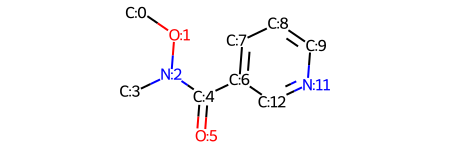

Product subgroup


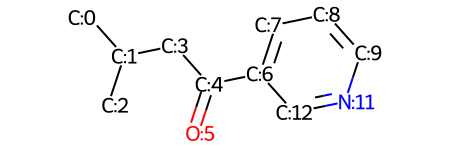

In [104]:
i+=1
print(temp_df.iloc[i])
print("Reactant")
display(Chem.MolFromSmiles(temp_df.iloc[i]["reactants"]))
print("Product")
display(Chem.MolFromSmiles(temp_df.iloc[i]["products"]))
print("Reactant subgroup")
display(Chem.MolFromSmiles(temp_df.iloc[i]["rsig"]))
print("Product subgroup")
display(Chem.MolFromSmiles(temp_df.iloc[i]["psig"]))

# Let's just dump the ones with 1-1 because there are enough of them

In [105]:
dataset = dataset[(rlen==1)&(plen==1)]

dataset.shape

(378628, 10)

In [106]:
# First, we confirm that num(sig) = num(cen) = num(sub)
rcenlen = np.array(list(map(lambda x: len(x.split(",")), dataset["rcen"])))
pcenlen = np.array(list(map(lambda x: len(x.split(",")), dataset["pcen"])))
rsiglen = np.array(list(map(lambda x: len(x.split(".")), dataset["rsig"])))
psiglen = np.array(list(map(lambda x: len(x.split(".")), dataset["psig"])))
rsublen = np.array(list(map(lambda x: len(x.split(".")), dataset["rsub"])))
psublen = np.array(list(map(lambda x: len(x.split(".")), dataset["psub"])))

In [107]:
dataset = dataset[(rcenlen==rsiglen) & (pcenlen==psiglen) & (rcenlen==rsublen) & (pcenlen==psublen)]
dataset.shape

(377566, 10)

In [108]:
dataset

,reactants,products,rsig,psig,rsub,psub,rcen,pcen,rbond,pbond
0,CON(C)C(=O)c1ccc(O)nc1,CC(C)CC(=O)c1ccc(O)nc1,[CH3:0][O:1][N:2]([CH3:3])[C:4](=[O:5])[c:6]1[...,[CH3:0][CH:1]([CH3:2])[CH2:3][C:4](=[O:5])[c:6...,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][CH:1]([CH3:2])[CH3:3],[2],[3],[[1.0]],[[1.0]]
1,O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],[cH:3]1[cH:4][cH:5][c:6]([Cl:7])[cH:8][cH:12]1,[CH3:0][NH:1][c:2]1[cH:3][cH:4][cH:5][cH:9][cH...,[ClH:7],[CH3:0][NH2:1],[7],[1],[[1.0]],[[1.0]]
2,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(N)cc3)cc21,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(NC=O)cc3)cc21,[n:2]1[cH:3][cH:4][cH:8][c:10]2[cH:11][cH:12][...,[n:2]1[cH:3][cH:4][cH:8][c:10]2[cH:11][cH:12][...,[NH3:19],[NH2:19][CH:20]=[O:21],[19],[19],[[1.0]],[[1.0]]
3,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)O)c1,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)Nc...,[cH:6]1[cH:7][cH:8][cH:22][c:23]([C:24](=[O:25...,[cH:6]1[cH:7][cH:8][cH:22][c:23]([C:24](=[O:25...,[OH2:26],[NH2:26][c:27]1[cH:28][n:29][c:30]([CH3:31])[c...,[26],[26],[[1.0]],[[1.0]]
4,Clc1cc2c(Cl)nc(-c3ccncc3)nc2s1,Clc1cc2c(NCc3ccc(Cl)c(Cl)c3)nc(-c3ccncc3)nc2s1,[cH:1]1[cH:2][c:3]2[c:4]([Cl:5])[n:6][c:7](-[c...,[cH:1]1[cH:2][c:3]2[c:4]([NH:5][CH2:6][c:7]3[c...,[ClH:5],[NH2:5][CH2:6][c:7]1[cH:8][cH:9][c:10]([Cl:11]...,[5],[5],[[1.0]],[[1.0]]
...,...,...,...,...,...,...,...,...,...,...
448501,COC(=O)c1ccc(-n2cnc3cc(C#N)ccc32)cc1,N#Cc1ccc2c(c1)ncn2-c1ccc(C(=O)N2CCC(N3CCCC3)C2...,[CH3:0][O:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][c:...,[cH:2]1[cH:3][cH:4][c:5]2[c:6]([cH:7]1)[n:8][c...,[CH3:0][OH:1],[NH:17]1[CH2:18][CH2:19][CH:20]([N:21]2[CH2:22...,[1],[17],[[1.0]],[[1.0]]
448502,O=C(Cl)OCC(Cl)(Cl)Cl,O=C(O)OCC(Cl)(Cl)Cl,[O:0]=[C:1]([Cl:2])[OH:3],[O:0]=[C:1]([OH:2])[OH:3],[ClH:2],[OH2:2],[2],[2],[[1.0]],[[1.0]]
448504,CCP(CC)CC,CCCCOS(=O)(=O)[O-],[CH3:0][CH2:1][P:2]([CH2:3][CH3:4])[CH2:5][CH3:6],[CH3:0][CH2:1][CH2:2][CH2:3][O:4][S:5](=[O:6])...,[PH:2]([CH2:3][CH3:4])[CH2:5][CH3:6],[CH3:2][CH2:3][O:4][S:5](=[O:6])(=[O:7])[O-:8],[2],[2],[[1.0]],[[1.0]]
448505,CCCCOS(=O)(=O)OCCCC,CCCC[P+](CC)(CC)CC,[CH3:2][CH2:3][O:4][S:5](=[O:6])(=[O:7])[O:8][...,[CH3:2][CH2:3][P+:4]([CH2:5][CH3:6])([CH2:7][C...,[OH:4][S:5](=[O:6])(=[O:7])[O:8][CH2:9][CH2:10...,[P+:4]([CH2:5][CH3:6])([CH2:7][CH3:8])[CH2:9][...,[4],[4],[[1.0]],[[1.0]]


ACTION REMAP  
Renumber the atoms in the actions. Renumber the centre.  
Find which rsig are same(and the same corresponding centre), then map unique rsig to all possible psigs 

In [109]:
# Renumber the atoms in the signatures to start from 0 and be contiguous. Renumber the centre accordingly. 

def reduce_atom_num_and_centre(sub, sig, cen):
    '''
    Reduce the atom numbers to start from 0. Reduce centre by same amount. 
    Centre is in format '[x]'. Make it x of type int.
    Return new_sub, new_sig, x
    '''
    mol = Chem.MolFromSmiles(sig)
    sub_mol = Chem.MolFromSmiles(sub)
    
    atom_num_list = list(map(lambda x: int(mol.GetAtomWithIdx(x).GetProp("molAtomMapNumber")), range(mol.GetNumAtoms())))
    atom_num_list = np.array(atom_num_list)
    
    sub_num_list = list(map(lambda x: int(sub_mol.GetAtomWithIdx(x).GetProp("molAtomMapNumber")), range(sub_mol.GetNumAtoms())))
    sub_num_list = np.array(sub_num_list)
    
    for idx in range(mol.GetNumAtoms()):
        # First replace that num in sub
        atm_num = int(mol.GetAtomWithIdx(idx).GetProp("molAtomMapNumber"))
        if atm_num in sub_num_list:
            sub_mol.GetAtomWithIdx(int(abs(sub_num_list-atm_num).argmin())).SetProp("molAtomMapNumber", str(idx))

        # If centre matches, update
        if atm_num == int(cen[1:-1]):
            new_cen = abs(atom_num_list-int(cen[1:-1])).argmin()
        
        # Then change in sig
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str(idx) )
    
    return Chem.MolToSmiles(sub_mol), Chem.MolToSmiles(mol), new_cen

i = 4
reduce_atom_num_and_centre(dataset.iloc[i]["psub"], dataset.iloc[i]["psig"], dataset.iloc[i]["pcen"])

('[NH2:4][CH2:5][c:6]1[cH:7][cH:8][c:9]([Cl:10])[c:11]([Cl:12])[cH:13]1',
 '[cH:0]1[cH:1][c:2]2[c:3]([NH:4][CH2:5][c:6]3[cH:7][cH:8][c:9]([Cl:10])[c:11]([Cl:12])[cH:13]3)[n:14][c:15](-[c:16]3[cH:17][cH:18][n:19][cH:20][cH:21]3)[n:22][c:23]2[s:24]1',
 4)

In [110]:
for i in tqdm.tqdm(range(dataset.shape[0]), total=dataset.shape[0]):
    _, _, rsig, psig, rsub, psub, rcen, pcen, _, _ = dataset.iloc[i]
    rsub, rsig, rcen = reduce_atom_num_and_centre(rsub, rsig, rcen)
    psub, psig, pcen = reduce_atom_num_and_centre(psub, psig, pcen)
    dataset.iloc[i]["rsub"] = rsub
    dataset.iloc[i]["rsig"] = rsig
    dataset.iloc[i]["psub"] = psub
    dataset.iloc[i]["psig"] = psig
    dataset.iloc[i]["rcen"] = rcen
    dataset.iloc[i]["pcen"] = pcen

100%|████████████████████████████████████████████████████████████████████| 377566/377566 [07:30<00:00, 838.90it/s]


In [111]:
# First create clusters based on atom type and numbers
d = {}
for i in tqdm.tqdm(range(dataset.shape[0]), total=dataset.shape[0]):
    rsig = dataset.iloc[i]["rsig"]
    
    l = list(map(str.upper, list(filter(str.isalpha, list(rsig)))))
    l.sort()
    _id = "".join(l)
    _id = _id.replace("H", "")
    
    if _id in d:
        d[_id].append(i)
    else:
        d[_id] = [i]

100%|██████████████████████████████████████████████████████████████████| 377566/377566 [00:19<00:00, 18947.49it/s]


In [112]:
# Divide the clusters based on signature structure
def divide_based_on_signatures(listy, r_or_p="r"):
    if r_or_p=="r":
        sig_choice = "rsig"
    elif r_or_p == "p":
        sig_choice = "psig"
        
    reference_d = {}
    cluster_d = {}
    for i in listy:
        rsig = Chem.MolFromSmiles(dataset.iloc[i][sig_choice])
        if not reference_d: # Starting element
            cluster_d[i] = [i]
            reference_d[i] = rsig
            continue
        
        # Search for appropriate cluster
        clustered = False
        for key_i in reference_d:
            ref_rsig = reference_d[key_i]
            if rsig.HasSubstructMatch(ref_rsig) and ref_rsig.HasSubstructMatch(rsig):
                # Add to this cluster
                cluster_d[key_i].append(i)
                clustered = True
                break
                
        if not clustered: # Add a new cluster
            cluster_d[i] = [i]
            reference_d[i] = rsig
            
    return cluster_d

rsig_d = {}
for key in tqdm.tqdm(d, total=len(d.keys())):
    rsig_d.update(divide_based_on_signatures(d[key]))

100%|█████████████████████████████████████████████████████████████████████████| 4420/4420 [00:50<00:00, 87.97it/s]


In [113]:
# Divide the clusters based on reaction centre
def divide_based_on_centre(listy, r_or_p="r"):
    if r_or_p=="r":
        sig_choice = "rsig"
        cen_choice = "rcen"
    elif r_or_p == "p":
        sig_choice = "psig"
        cen_choice = "pcen"
        
    reference_d = {}
    reference_cen = {}
    cluster_d = {}
    for i in listy:
        rsig = Chem.MolFromSmiles(dataset.iloc[i][sig_choice])
        if not reference_d: # Starting element
            cluster_d[i] = [i]
            reference_d[i] = rsig
            reference_cen[i] = dataset.iloc[i][cen_choice]
            continue
        
        # Search for appropriate cluster
        clustered = False
        for key_i in reference_d:
            ref_rsig = reference_d[key_i]
            if rsig.GetSubstructMatch(ref_rsig)[dataset.iloc[key_i][cen_choice]] == reference_cen[key_i]:
                # Add to this cluster
                cluster_d[key_i].append(i)
                clustered = True
                break
                
        if not clustered: # Add a new cluster
            cluster_d[i] = [i]
            reference_d[i] = rsig
            reference_cen[i] = dataset.iloc[i][cen_choice]
            
    return cluster_d

rcen_d = {}
for key in tqdm.tqdm(rsig_d, total=len(rsig_d.keys())):
    rcen_d.update(divide_based_on_centre(rsig_d[key]))

100%|██████████████████████████████████████████████████████████████████████| 29411/29411 [01:18<00:00, 375.88it/s]


In [114]:
# Divide based on bond types
def divide_based_on_bond(listy, r_or_p='r'):
    if r_or_p == "r":
        bond_choice = "rbond"
    elif r_or_p == "p":
        bond_choice = "pbond"
        
    reference_bond = {}
    cluster_d = {}
    for i in listy:
        bond = dataset.iloc[i][bond_choice]
        if not reference_bond:
            cluster_d[i] = [i]
            reference_bond[i] = bond
            continue
        
        # Search the appropriate cluster
        clustered = False
        for key_i in reference_bond:
            ref_bond = reference_bond[key_i]
            if set(bond) == set(ref_bond):
                # add to this cluster
                cluster_d[key_i].append(i)
                clustered = True
                break
                
        if not clustered: # add a new cluster
            cluster_d[i] = [i]
            reference_bond[i] = bond
            
    return cluster_d

rbond_d = {}
for key in tqdm.tqdm(rcen_d, total=len(rcen_d.keys())):
    rbond_d.update(divide_based_on_bond(rcen_d[key]))

100%|█████████████████████████████████████████████████████████████████████| 40947/40947 [00:17<00:00, 2391.62it/s]


In [115]:
# Next we divide based on psig, pcen and pbond so that we can get unique rsig to unique psig matchings
psig_d = {}
for key in tqdm.tqdm(rbond_d, total=len(rbond_d.keys())):
    psig_d[key] = divide_based_on_signatures(rbond_d[key], r_or_p="p")    

100%|██████████████████████████████████████████████████████████████████████| 42787/42787 [03:04<00:00, 232.25it/s]


In [116]:
pcen_d = {}
for key in tqdm.tqdm(psig_d, total=len(psig_d.keys())):
    new_d = {}
    temp_d = psig_d[key]
    for temp_key in temp_d:
        new_d[temp_key] = divide_based_on_centre(temp_d[temp_key], r_or_p="p")
    pcen_d[key] = new_d

temp_d = dict(pcen_d)
pcen_d = {}
for key in temp_d:
    pcen_d[key] = {}
    d = temp_d[key]
    for key2 in d:
        pcen_d[key].update(d[key2])
        
del temp_d

100%|██████████████████████████████████████████████████████████████████████| 42787/42787 [01:10<00:00, 611.15it/s]


In [117]:
pbond_d = {}
for key in tqdm.tqdm(pcen_d, total=len(pcen_d.keys())):
    new_d = {}
    temp_d = pcen_d[key]
    for temp_key in temp_d:
        new_d[temp_key] = divide_based_on_bond(temp_d[temp_key], r_or_p="p")
    pbond_d[key] = new_d

# temp_d = dict(pbond_d)
# pbond_d = {}
# for key in temp_d:
#     pbond_d[key] = {}
#     d = temp_d[key]
#     for key2 in d:
#         pbond_d[key].update(d[key2])
        
# del temp_d

100%|█████████████████████████████████████████████████████████████████████| 42787/42787 [00:17<00:00, 2443.05it/s]


In [118]:
# Finally, we dump a DataFrame with unique rsig-psig pairs(actions)
# Also, we group rsigs so that searching becomes easier later on
# action_df = DataFrame

unique_rsig_indexer = np.zeros(shape=dataset.shape[0], dtype=int)
for key in rbond_d:
    for ele in rbond_d[key]:
        unique_rsig_indexer[ele] = key
        
dataset["rsig_clusters"] = unique_rsig_indexer

unique_action_indexer = []
for key in pbond_d:
    for key2 in pbond_d[key]:
        unique_action_indexer.extend(list(pbond_d[key][key2].keys()))

action_df = dataset.iloc[unique_action_indexer]

action_df.to_csv("/home/abhor/Desktop/repos/ReactionRL/datasets/my_uspto/action_dataset.csv")